## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Preparation

In [2]:
df = pd.read_csv("COVID-19 Coronavirus.csv", encoding='windows-1252')

In [3]:
pd.DataFrame(df.head())

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [4]:
print(f'Shape of the dataset is : {df.shape}') 

Shape of the dataset is : (225, 10)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [6]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


### 1. Missing Value Processing

In [7]:
# 填補缺失值

df['Population'].fillna(value=df['Population'].mean(), inplace=True)
df['Total Cases'].fillna(value=df['Total Cases'].mean(), inplace=True)
df['Total Deaths'].fillna(value=df['Total Deaths'].mean(), inplace=True)
df['Tot Cases//1M pop'].fillna(value=df['Tot Cases//1M pop'].mean(), inplace=True)
df['Tot Deaths/1M pop'].fillna(value=df['Tot Deaths/1M pop'].mean(), inplace=True)
df['Death percentage'].fillna(value=df['Death percentage'].mean(), inplace=True)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [8]:
df.isna().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [9]:
df=df.drop('Other names', axis=1)

### 2. Data Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
data = np.transpose(df[['Population', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop', 
                        'Tot Deaths/1M pop', 'Death percentage']])

In [12]:
col = df['Continent']
data.columns = col
index = data.index
data

Continent,Asia,Europe,Africa,Europe,Africa,Latin America and the Caribbean,Latin America and the Caribbean,Latin America and the Caribbean,Asia,Latin America and the Caribbean,...,Asia,Oceania,Europe,Latin America and the Caribbean,Asia,Oceania,Africa,Asia,Africa,Africa
Population,4.046219e+07,2.872296e+06,4.523670e+07,77481.000000,3.465421e+07,15237.000000,99348.000000,4.592176e+07,2.972939e+06,107560.000000,...,3.431816e+07,319701.000000,805.0,2.829490e+07,9.887171e+07,10894.00000,623031.0,3.097526e+07,1.928448e+07,1.524160e+07
Total Cases,1.778270e+05,2.738700e+05,2.656910e+05,40024.000000,9.919400e+04,2700.000000,7493.000000,9.041124e+06,4.225740e+05,34051.000000,...,2.378530e+05,4107.000000,29.0,5.208430e+05,9.818328e+06,454.00000,10.0,1.180600e+04,3.170760e+05,2.465250e+05
Total Deaths,7.671000e+03,3.492000e+03,6.874000e+03,153.000000,1.900000e+03,9.000000,135.000000,1.280650e+05,8.617000e+03,212.000000,...,1.637000e+03,2.000000,0.0,5.686000e+03,4.260000e+04,7.00000,1.0,2.143000e+03,3.967000e+03,5.446000e+03
Tot Cases//1M pop,4.395000e+03,9.534900e+04,5.873000e+03,516565.000000,2.862000e+03,177200.000000,75422.000000,1.968810e+05,1.421400e+05,316577.000000,...,6.931000e+03,12846.000000,36025.0,1.840800e+04,9.930400e+04,41674.00000,16.0,3.810000e+02,1.644200e+04,1.617400e+04
Tot Deaths/1M pop,1.900000e+02,1.216000e+03,1.520000e+02,1975.000000,5.500000e+01,591.000000,1359.000000,2.789000e+03,2.898000e+03,1971.000000,...,4.800000e+01,6.000000,0.0,2.010000e+02,4.310000e+02,643.00000,2.0,6.900000e+01,2.060000e+02,3.570000e+02
Death percentage,4.313743e+00,1.275058e+00,2.587216e+00,0.382271,1.915438e+00,0.333333,1.801682,1.416472e+00,2.039169e+00,0.622596,...,6.882402e-01,0.048697,0.0,1.091692e+00,4.338824e-01,1.54185,10.0,1.815179e+01,1.251120e+00,2.209107e+00


In [13]:
from sklearn import preprocessing
x_scale = preprocessing.scale(data)
x_scale

array([[ 2.23604788,  2.22650454,  2.23603173, ...,  2.23606783,
         2.2357846 ,  2.23579672],
       [-0.43792936, -0.25516233, -0.43473636, ..., -0.44644056,
        -0.41231815, -0.41309678],
       [-0.4492239 , -0.51339101, -0.45010716, ..., -0.44727771,
        -0.45603234, -0.4556836 ],
       [-0.44944135, -0.42566157, -0.4501666 , ..., -0.44743036,
        -0.45429067, -0.45378849],
       [-0.44972047, -0.51556474, -0.45050637, ..., -0.44745739,
        -0.45655743, -0.45658258],
       [-0.4497328 , -0.51672488, -0.45051524, ..., -0.4474618 ,
        -0.45658601, -0.45664525]])

In [14]:
data = pd.DataFrame(x_scale)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,2.236048,2.226505,2.236032,-0.153723,2.236059,-0.267982,1.684285,2.192927,2.214621,0.271053,...,2.236017,2.234402,-0.399362,2.235710,2.225203,0.128667,2.236068,2.236068,2.235785,2.235797
1,-0.437929,-0.255162,-0.434736,-0.355389,-0.441138,-0.461225,-0.566974,-0.010394,-0.157121,-0.375199,...,-0.432439,-0.440821,-0.457416,-0.407944,-0.229331,-0.560757,-0.447204,-0.446441,-0.412318,-0.413097
2,-0.449224,-0.513391,-0.450107,-0.570052,-0.448676,-0.502704,-0.747310,-0.542877,-0.542085,-0.672693,...,-0.450935,-0.475619,-0.459586,-0.456978,-0.498775,-0.590275,-0.447243,-0.447278,-0.456032,-0.455684
3,-0.449441,-0.425662,-0.450167,2.210280,-0.448602,2.228481,1.097886,-0.538766,-0.417914,2.108618,...,-0.450520,-0.366743,2.235536,-0.455768,-0.497212,2.161276,-0.447178,-0.447430,-0.454291,-0.453788
4,-0.449720,-0.515565,-0.450506,-0.560243,-0.448819,-0.493733,-0.717311,-0.550362,-0.547404,-0.657229,...,-0.451059,-0.475585,-0.459586,-0.457501,-0.499937,-0.548276,-0.447239,-0.447457,-0.456557,-0.456583


In [15]:
data.columns = col

In [16]:
data.index = index
data

Continent,Asia,Europe,Africa,Europe,Africa,Latin America and the Caribbean,Latin America and the Caribbean,Latin America and the Caribbean,Asia,Latin America and the Caribbean,...,Asia,Oceania,Europe,Latin America and the Caribbean,Asia,Oceania,Africa,Asia,Africa,Africa
Population,2.236048,2.226505,2.236032,-0.153723,2.236059,-0.267982,1.684285,2.192927,2.214621,0.271053,...,2.236017,2.234402,-0.399362,2.235710,2.225203,0.128667,2.236068,2.236068,2.235785,2.235797
Total Cases,-0.437929,-0.255162,-0.434736,-0.355389,-0.441138,-0.461225,-0.566974,-0.010394,-0.157121,-0.375199,...,-0.432439,-0.440821,-0.457416,-0.407944,-0.229331,-0.560757,-0.447204,-0.446441,-0.412318,-0.413097
Total Deaths,-0.449224,-0.513391,-0.450107,-0.570052,-0.448676,-0.502704,-0.747310,-0.542877,-0.542085,-0.672693,...,-0.450935,-0.475619,-0.459586,-0.456978,-0.498775,-0.590275,-0.447243,-0.447278,-0.456032,-0.455684
Tot Cases//1M pop,-0.449441,-0.425662,-0.450167,2.210280,-0.448602,2.228481,1.097886,-0.538766,-0.417914,2.108618,...,-0.450520,-0.366743,2.235536,-0.455768,-0.497212,2.161276,-0.447178,-0.447430,-0.454291,-0.453788
Tot Deaths/1M pop,-0.449720,-0.515565,-0.450506,-0.560243,-0.448819,-0.493733,-0.717311,-0.550362,-0.547404,-0.657229,...,-0.451059,-0.475585,-0.459586,-0.457501,-0.499937,-0.548276,-0.447239,-0.447457,-0.456557,-0.456583
Death percentage,-0.449733,-0.516725,-0.450515,-0.570874,-0.448823,-0.502837,-0.750575,-0.550528,-0.550097,-0.674551,...,-0.451063,-0.475635,-0.459586,-0.457520,-0.499949,-0.590636,-0.447204,-0.447462,-0.456586,-0.456645


In [17]:
data = data.transpose()
data

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
Continent,,,,,,
Asia,2.236048,-0.437929,-0.449224,-0.449441,-0.449720,-0.449733
Europe,2.226505,-0.255162,-0.513391,-0.425662,-0.515565,-0.516725
Africa,2.236032,-0.434736,-0.450107,-0.450167,-0.450506,-0.450515
Europe,-0.153723,-0.355389,-0.570052,2.210280,-0.560243,-0.570874
Africa,2.236059,-0.441138,-0.448676,-0.448602,-0.448819,-0.448823
...,...,...,...,...,...,...
Oceania,0.128667,-0.560757,-0.590275,2.161276,-0.548276,-0.590636
Africa,2.236068,-0.447204,-0.447243,-0.447178,-0.447239,-0.447204
Asia,2.236068,-0.446441,-0.447278,-0.447430,-0.447457,-0.447462


## Data Visualization

In [18]:
cases_per_continent = data.groupby('Continent').sum()
cases_per_continent

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
Continent,,,,,,
Africa,126.899427,-23.508037,-27.513191,-20.799670,-27.520224,-27.558306
Asia,107.544065,-11.795184,-25.411581,-19.364815,-25.476617,-25.495867
Europe,79.980050,1.386139,-29.322419,6.963290,-29.417008,-29.590052
Latin America and the Caribbean,71.457752,-15.950284,-28.046293,28.540438,-27.783618,-28.217995
Northern America,4.326182,-1.513094,-2.763803,5.469657,-2.742188,-2.776754
Oceania,27.448988,-6.882813,-9.556024,8.045451,-9.486507,-9.569094


In [19]:
data.reset_index(inplace = True)
data

,Continent,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Asia,2.236048,-0.437929,-0.449224,-0.449441,-0.449720,-0.449733
1,Europe,2.226505,-0.255162,-0.513391,-0.425662,-0.515565,-0.516725
2,Africa,2.236032,-0.434736,-0.450107,-0.450167,-0.450506,-0.450515
3,Europe,-0.153723,-0.355389,-0.570052,2.210280,-0.560243,-0.570874
4,Africa,2.236059,-0.441138,-0.448676,-0.448602,-0.448819,-0.448823
...,...,...,...,...,...,...,...
220,Oceania,0.128667,-0.560757,-0.590275,2.161276,-0.548276,-0.590636
221,Africa,2.236068,-0.447204,-0.447243,-0.447178,-0.447239,-0.447204
222,Asia,2.236068,-0.446441,-0.447278,-0.447430,-0.447457,-0.447462
223,Africa,2.235785,-0.412318,-0.456032,-0.454291,-0.456557,-0.456586


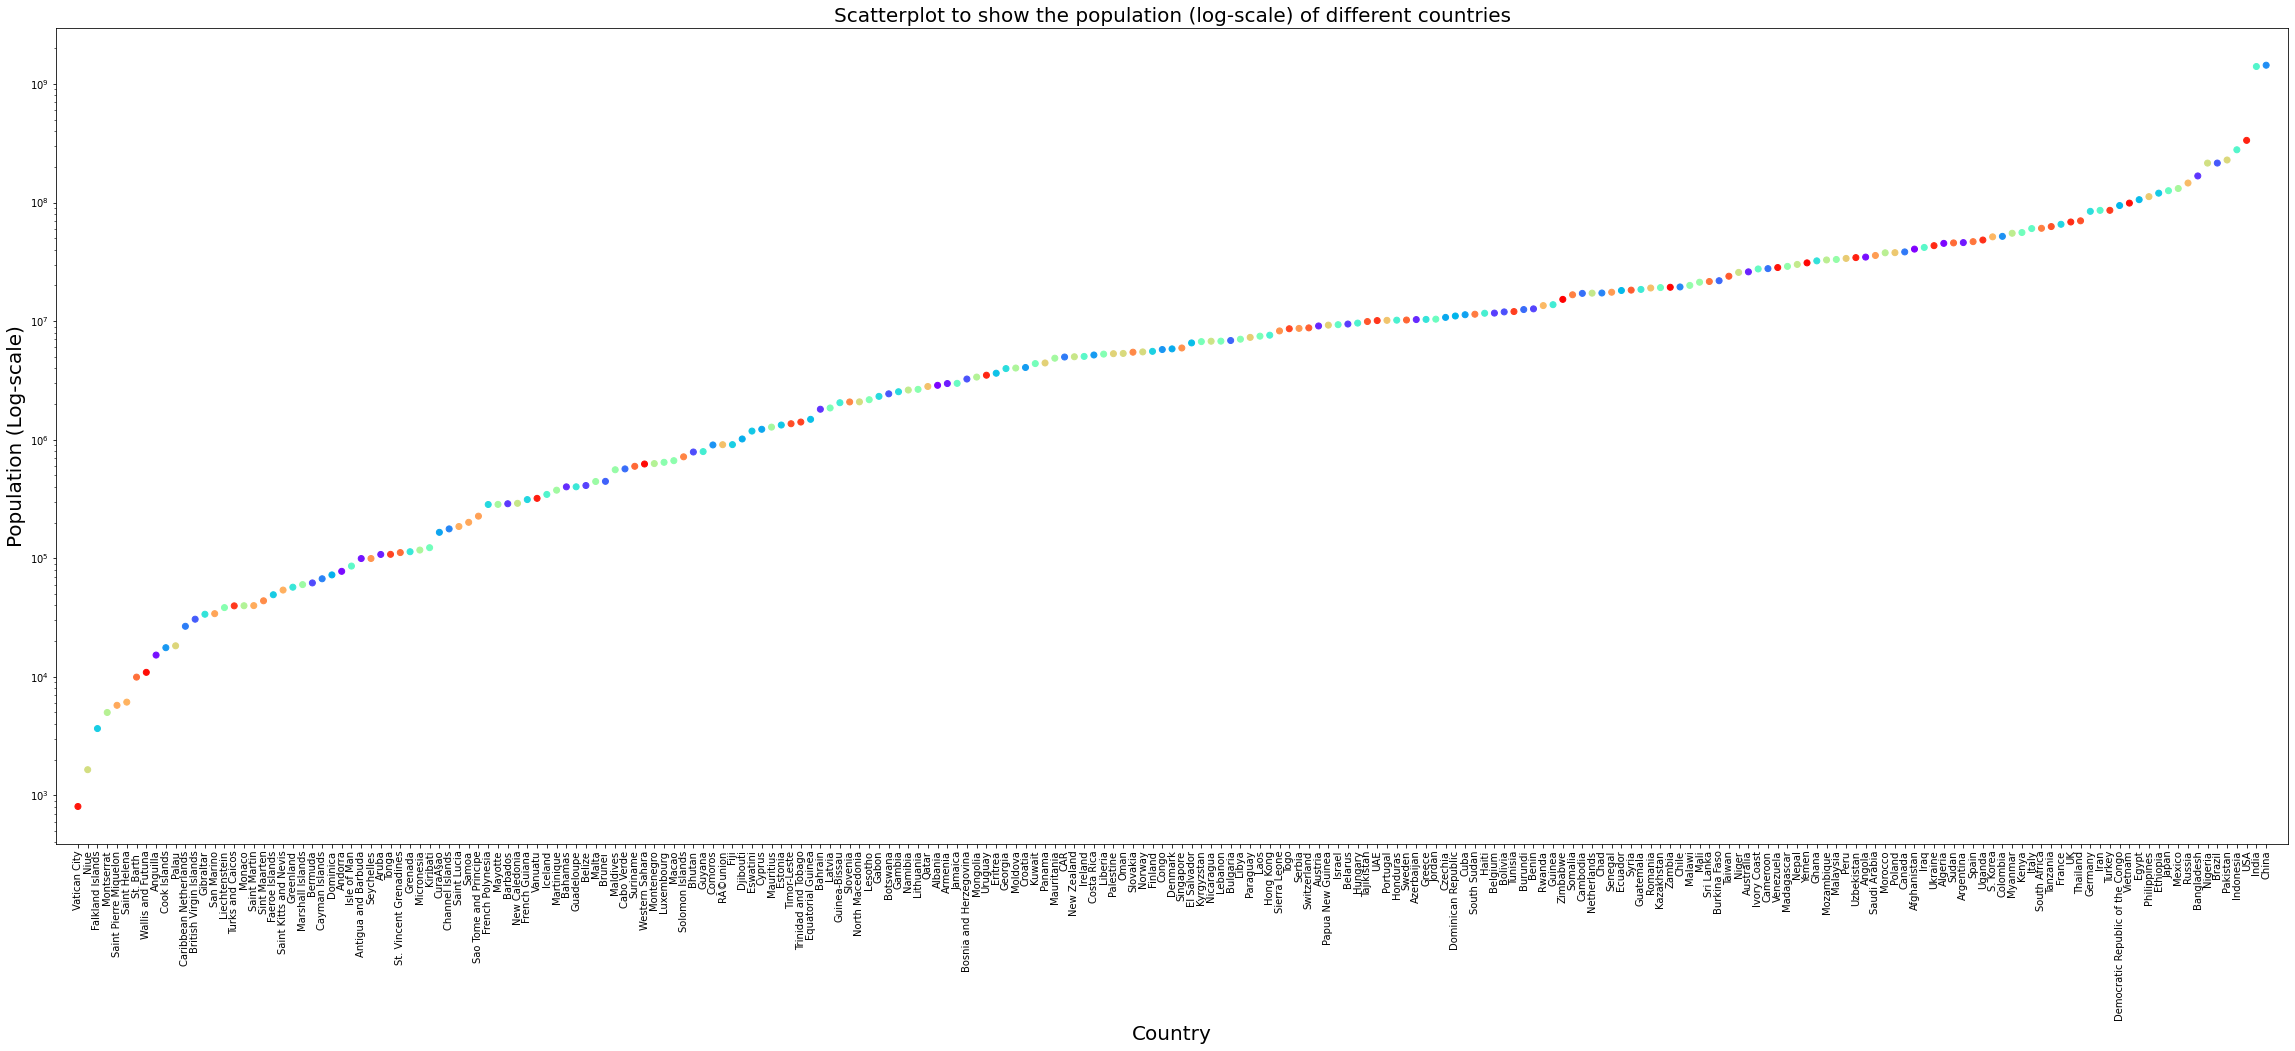

In [20]:
# Matplotlib scatter plot with different hues : x= Country, y = population

# filter data down to only one Country, as all population values are equal for a Country.
temp_data = df[['Country', 'Population']].drop_duplicates(subset="Country", keep="first")

# sort data for plotting, based on ascending population
temp_data.sort_values('Population', inplace=True)

# Initiate figure and plot
fig, ax = plt.subplots(figsize = (40,15))
plt.scatter(x='Country', y='Population', data=temp_data, c=temp_data.index, cmap="rainbow")

# Axis and formatting
ax.set_title("Scatterplot to show the population (log-scale) of different countries", fontsize = 20)
ax.set_xticklabels(temp_data['Country'], rotation = 90)
ax.set_xlabel("Country", fontsize = 20)
ax.set_ylabel("Population (Log-scale)", fontsize = 20)
ax.set_yscale("log")

plt.margins(x=0.01)

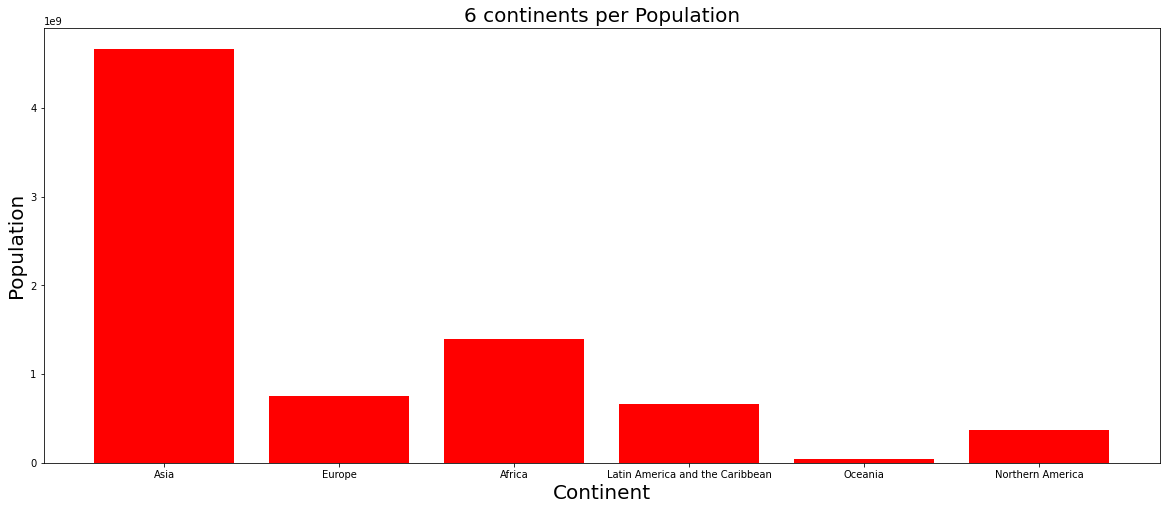

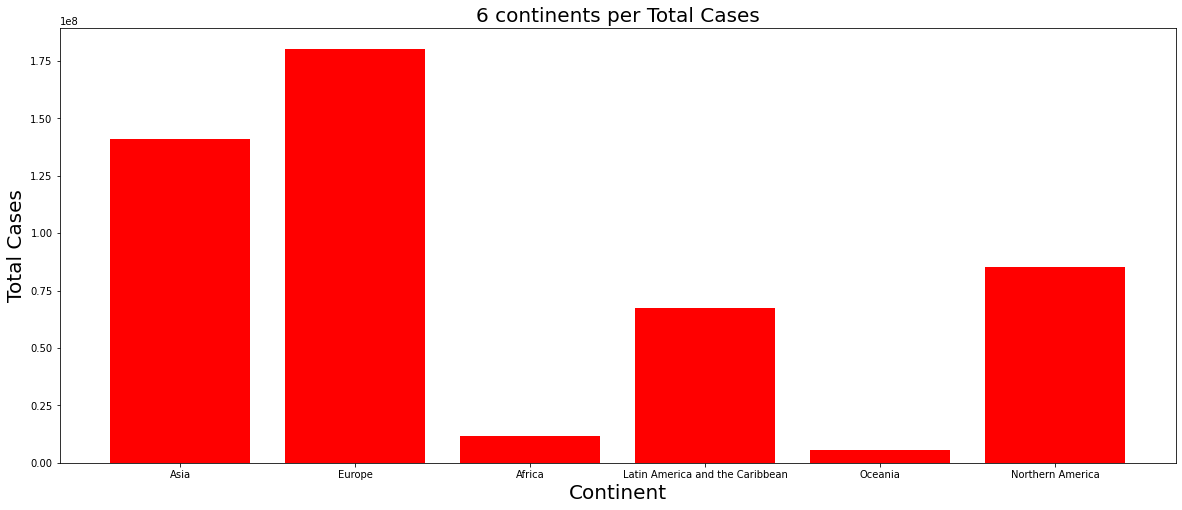

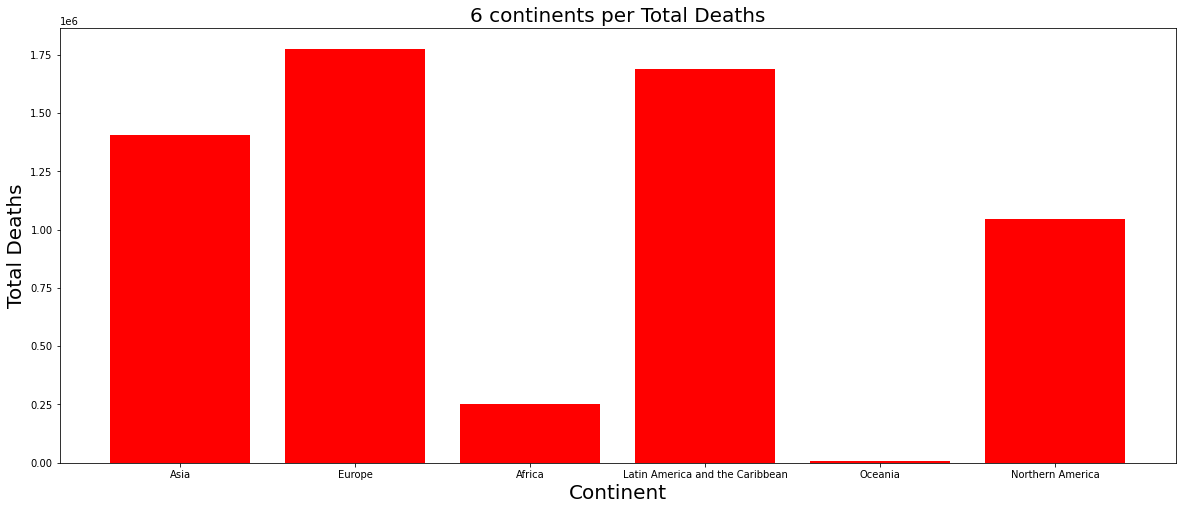

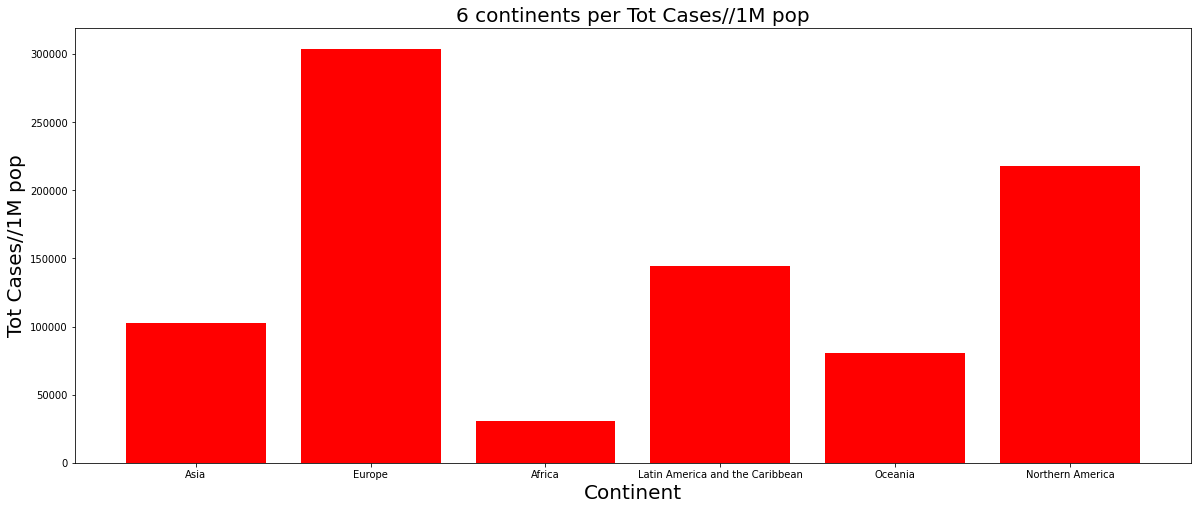

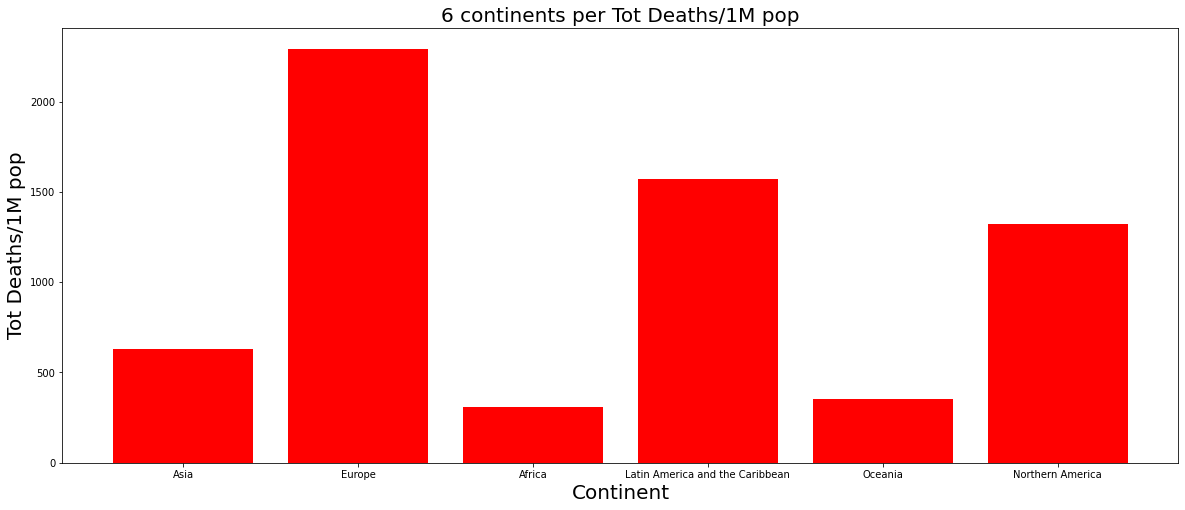

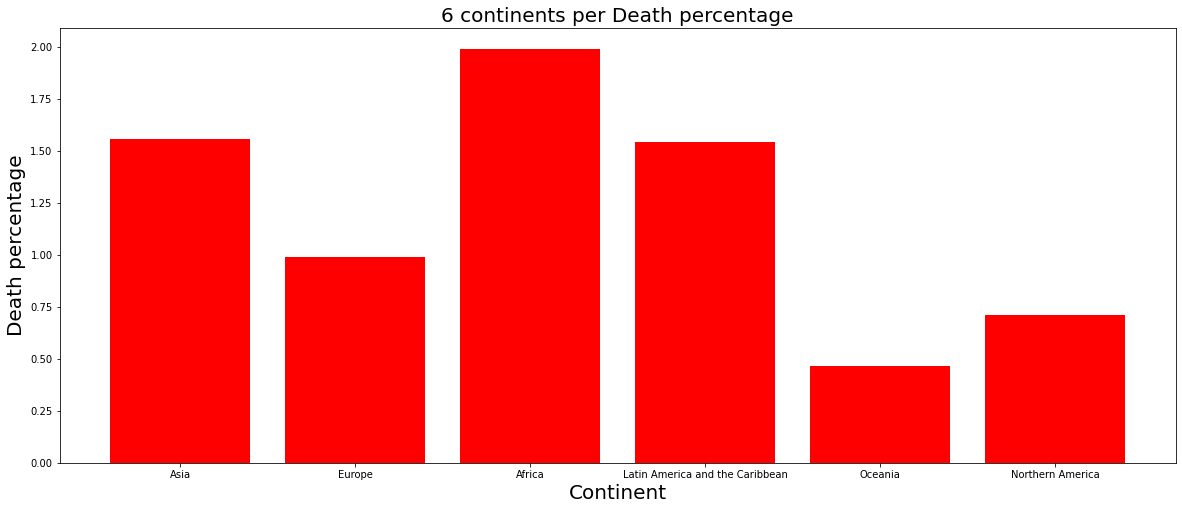

In [21]:
columns1 = ['Population', 'Total Cases', 'Total Deaths']
columns2 = ['Tot Cases//1M pop', 'Tot Deaths/1M pop', 'Death percentage']
continents = ['Asia', 'Europe', 'Africa', 'Latin America and the Caribbean', 'Oceania', 'Northern America']

for column in columns1:
    mean = []
    for continent in continents:
        mean.append(df.loc[df['Continent'] == continent, [column]].sum())
    mean = np.array(mean)
    mean = np.reshape(mean, 6)
#     print(mean)
    plt.figure(figsize=(20,8))
    plt.bar(continents, mean, color='red', alpha=1)
    plt.ylabel(column, fontsize = 20)
    plt.xlabel("Continent", fontsize = 20)
    plt.title(f'6 continents per {column}', fontsize = 20)
    plt.show()
    
for column in columns2:
    mean = []
    for continent in continents:
        mean.append(df.loc[df['Continent'] == continent, [column]].mean())
    mean = np.array(mean)
    mean = np.reshape(mean, 6)
#     print(mean)
    plt.figure(figsize=(20,8))
    plt.bar(continents, mean, color='red', alpha=1)
    plt.ylabel(column, fontsize = 20)
    plt.xlabel("Continent", fontsize = 20)
    plt.title(f'6 continents per {column}', fontsize = 20)
    plt.show()

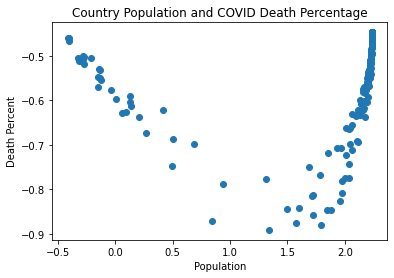

In [22]:
#Scatter Plot
plt.scatter(data["Population"], data["Death percentage"])

plt.title("Country Population and COVID Death Percentage")
plt.xlabel("Population")
plt.ylabel("Death Percent")
plt.show()

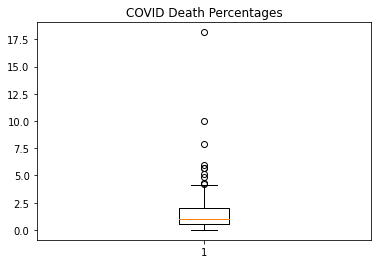

In [23]:
# Boxplot
plt.boxplot(df["Death percentage"])

plt.title("COVID Death Percentages")
plt.show()